# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [26]:
# list of dictionaries to make df when done with loop
city_list = []

# variables for print log
set_num = 1
record_num = 1
city_count = 1

print('''Beginning Data Retrieval
-----------------------------''')
#looping through the cities
for i in range(len(cities)):
    # sending API call and getting json
    url = f"http://api.openweathermap.org/data/2.5/weather?q={cities[i]}&units=imperial&appid={weather_api_key}"
    weather_response = requests.get(url)
    weather_response_json = weather_response.json()

    # resetting my variables for the print log
    if not city_count <= 50:
        set_num += 1
        city_count = 0
        record_num = 0
    # using try except to add cities to database
    try: 
        city_lat = weather_response_json['coord']['lat']
        city_lon = weather_response_json['coord']['lon']
        max_temp = weather_response_json["main"]["temp_max"]
        humidity = weather_response_json["main"]["humidity"]
        cloudiness = weather_response_json["clouds"]["all"]
        wind_speed = weather_response_json["wind"]["speed"]
        country = weather_response_json["sys"]["country"]
        date = weather_response_json["dt"]
    
        city_list.append({
            'City': cities[i], 
            'Lat' : city_lat,
            'Lng' : city_lon,
            'Max Temp': max_temp,
            'Humidity' : humidity,
            'Cloudiness' : cloudiness,
            'Wind Speed' : wind_speed,
            'Country' : country,
            'Date' : date
        })
        
        print(f"Processing Record {record_num} of Set {set_num} | {cities[i]}")
        city_count += 1
        record_num += 1
    except:
        print("City not found. Skipping...")
        pass
print('''-----------------------------
Data Retrieval Complete
-----------------------------''')

temps_df = pd.DataFrame(city_list)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hami
Processing Record 2 of Set 1 | zarand
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | beyneu
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | nikolskoye
City not found. Skipping...
Processing Record 7 of Set 1 | saint george
Processing Record 8 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 9 of Set 1 | huarmey
Processing Record 10 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 11 of Set 1 | kapaa
City not found. Skipping...
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | comodoro rivadavia
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | tuatapere
Processing Record 18 of Set 1 | cayenne
Processing Record 19 of Set 1 | namibe
Processing Record 20 of Set 1 | castro
Processing Record 21 

Processing Record 36 of Set 4 | luderitz
City not found. Skipping...
Processing Record 37 of Set 4 | alyangula
Processing Record 38 of Set 4 | zhigansk
Processing Record 39 of Set 4 | broome
Processing Record 40 of Set 4 | bulandshahr
Processing Record 41 of Set 4 | aykhal
Processing Record 42 of Set 4 | caravelas
Processing Record 43 of Set 4 | canutama
Processing Record 44 of Set 4 | bolu
Processing Record 45 of Set 4 | labuhan
Processing Record 46 of Set 4 | cluses
Processing Record 47 of Set 4 | narsaq
Processing Record 48 of Set 4 | pizarro
Processing Record 49 of Set 4 | cherskiy
Processing Record 50 of Set 4 | ambilobe
Processing Record 0 of Set 5 | puerto carreno
Processing Record 1 of Set 5 | cockburn town
Processing Record 2 of Set 5 | qinggang
Processing Record 3 of Set 5 | waingapu
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | sungaipenuh
Processing Record 6 of Set 5 | mogwase
Processing Record 7 of Set 5 | constitucion
Processing Record 8 of Set 

Processing Record 21 of Set 8 | panguna
Processing Record 22 of Set 8 | sao filipe
Processing Record 23 of Set 8 | warrington
Processing Record 24 of Set 8 | filingue
Processing Record 25 of Set 8 | naryan-mar
City not found. Skipping...
Processing Record 26 of Set 8 | at-bashi
Processing Record 27 of Set 8 | tete
Processing Record 28 of Set 8 | fort saint james
Processing Record 29 of Set 8 | muisne
Processing Record 30 of Set 8 | leshukonskoye
Processing Record 31 of Set 8 | brakel
Processing Record 32 of Set 8 | kysyl-syr
City not found. Skipping...
Processing Record 33 of Set 8 | coquimbo
Processing Record 34 of Set 8 | shelburne
Processing Record 35 of Set 8 | santa clara
Processing Record 36 of Set 8 | vanavara
Processing Record 37 of Set 8 | iqaluit
Processing Record 38 of Set 8 | plaridel
Processing Record 39 of Set 8 | agadir
Processing Record 40 of Set 8 | camocim
Processing Record 41 of Set 8 | cuamba
Processing Record 42 of Set 8 | madang
Processing Record 43 of Set 8 | tsh

Processing Record 9 of Set 12 | palencia
Processing Record 10 of Set 12 | tskaltubo
Processing Record 11 of Set 12 | kargasok
Processing Record 12 of Set 12 | powell river
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
temps_df.to_csv('../output_data/weather_export.csv', index=False)
temps_df

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0            hami  42.80   93.45     12.79        71           0        5.97   
1          zarand  30.81   56.56     35.83        82           0        1.39   
2         mataura -46.19  168.86     60.01        70          82       10.00   
3          beyneu  45.32   55.20     22.71        95           0       12.59   
4          dikson  73.51   80.55     -3.84        92         100       14.52   
..            ...    ...     ...       ...       ...         ...         ...   
568       chicama  -7.84  -79.15     69.46        75          89        7.36   
569      palencia  42.42   -4.50     46.99        89          93        3.00   
570     tskaltubo  42.33   42.60     50.00        46           0       25.28   
571      kargasok  59.06   80.86      9.32        95         100        8.46   
572  powell river  49.85 -124.54     39.20       100          90        5.82   

    Country        Date  
0        CN  1607912099  
1        IR  1607912099  
2        NZ  1607911700  
3        KZ  1607911768  
4        RU  1607911748  
..      ...         ...  
568      PE  1607912201  
569      ES  1607912201  
570      GE  1607912201  
571      RU  1607912201  
572      CA  1607912106  

[573 rows x 9 columns]

In [28]:
temps_summary = temps_df.describe()
temps_summary

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  573.000000  573.000000  573.000000  573.000000  573.000000  573.000000   
mean    18.727208   18.220227   52.362565   75.294939   56.577661    7.990803   
std     33.832418   89.624362   29.079601   19.305112   40.706819    6.433588   
min    -54.800000 -179.170000  -52.920000    1.000000    0.000000    0.250000   
25%     -8.470000  -64.260000   34.390000   67.000000    7.000000    3.360000   
50%     22.290000   24.930000   61.000000   80.000000   75.000000    5.860000   
75%     46.430000   96.170000   75.400000   90.000000   99.000000   10.330000   
max     78.220000  179.320000   93.990000  100.000000  100.000000   46.190000   

               Date  
count  5.730000e+02  
mean   1.607912e+09  
std    2.120261e+02  
min    1.607911e+09  
25%    1.607912e+09  
50%    1.607912e+09  
75%    1.607912e+09  
max    1.607912e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
# no cities have a humidity greater than 100, skipped this

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

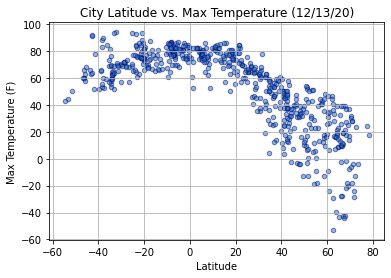

In [30]:
lat_temp_plot = temps_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, alpha=.5, edgecolors='navy')
lat_temp_plot.set_ylabel("Max Temperature (F)")
lat_temp_plot.set_xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (12/13/20)")
plt.savefig("../output_data/LatitudeMaxTempScatter.png")

## Latitude vs. Humidity Plot

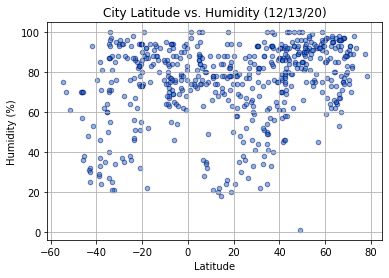

In [31]:
lat_hum_plot = temps_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, alpha=.5, edgecolors='navy')
lat_hum_plot.set_ylabel("Humidity (%)")
lat_hum_plot.set_xlabel("Latitude")
plt.title("City Latitude vs. Humidity (12/13/20)")
plt.savefig("../output_data/LatitudeHumidityScatter.png")

## Latitude vs. Cloudiness Plot

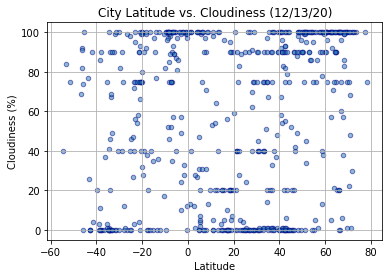

In [32]:
lat_cloud_plot = temps_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, alpha=.5, edgecolors='navy')
lat_cloud_plot.set_ylabel("Cloudiness (%)")
lat_cloud_plot.set_xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (12/13/20)")
plt.savefig("../output_data/LatitudeCloudinessScatter.png")

## Latitude vs. Wind Speed Plot

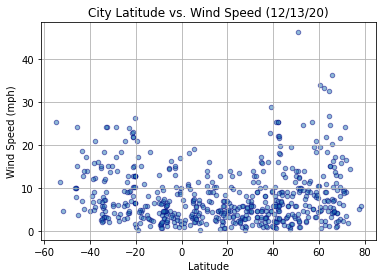

In [33]:
lat_wind_plot = temps_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, alpha=.5, edgecolors='navy')
lat_wind_plot.set_ylabel("Wind Speed (mph)")
lat_wind_plot.set_xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (12/13/20)")
plt.savefig("../output_data/LatitudeWindSpeedScatter.png")

## Linear Regression

In [34]:
temps_df['Hemisphere'] = ["Northern" if x > 0  else "Southern" for x in temps_df['Lat']]
north_temps_df = temps_df[temps_df["Hemisphere"] == "Northern"]
south_temps_df = temps_df[temps_df["Hemisphere"] == "Southern"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6615873428510264


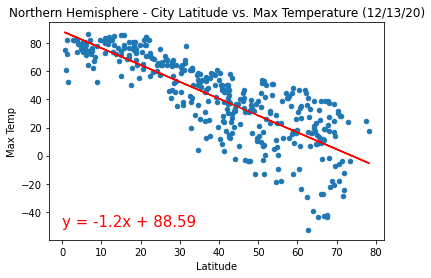

In [35]:
north_lat_temp_plot = north_temps_df.plot(kind="scatter", x="Lat", y="Max Temp")
north_lat_temp_plot.set_xlabel("Latitude")
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature (12/13/20)")

x_values = north_temps_df['Lat']
y_values = north_temps_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/NorthernLatitudeMaxTemp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2872040273132787


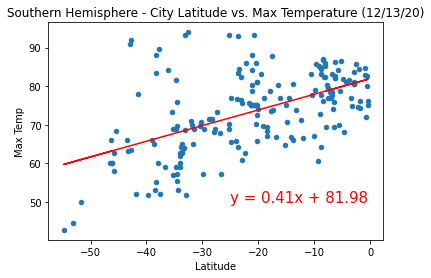

In [36]:
south_lat_temp_plot = south_temps_df.plot(kind="scatter", x="Lat", y="Max Temp")
south_lat_temp_plot.set_xlabel("Latitude")
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (12/13/20)")

x_values = south_temps_df['Lat']
y_values = south_temps_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/SouthernLatitudeMaxTemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0871190674445481


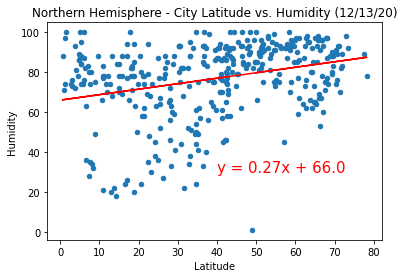

In [37]:
north_lat_temp_plot = north_temps_df.plot(kind="scatter", x="Lat", y="Humidity")
north_lat_temp_plot.set_xlabel("Latitude")
plt.title("Northern Hemisphere - City Latitude vs. Humidity (12/13/20)")

x_values = north_temps_df['Lat']
y_values = north_temps_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/NorthernLatitudeHumidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1222630847795331


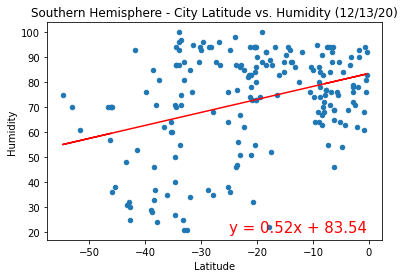

In [38]:
south_lat_temp_plot = south_temps_df.plot(kind="scatter", x="Lat", y="Humidity")
south_lat_temp_plot.set_xlabel("Latitude")
plt.title("Southern Hemisphere - City Latitude vs. Humidity (12/13/20)")

x_values = south_temps_df['Lat']
y_values = south_temps_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/SouthernLatitudeHumidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12070129351917025


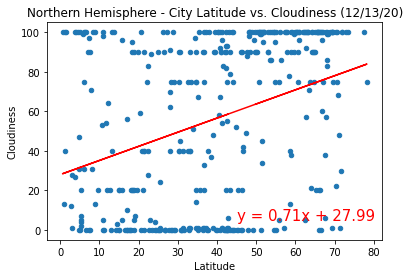

In [39]:
north_lat_temp_plot = north_temps_df.plot(kind="scatter", x="Lat", y="Cloudiness")
north_lat_temp_plot.set_xlabel("Latitude")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (12/13/20)")

x_values = north_temps_df['Lat']
y_values = north_temps_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/NorthernLatitudeCloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1353193954249023


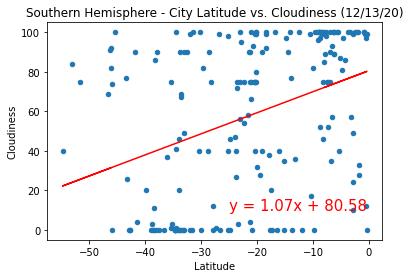

In [40]:
south_lat_temp_plot = south_temps_df.plot(kind="scatter", x="Lat", y="Cloudiness")
south_lat_temp_plot.set_xlabel("Latitude")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (12/13/20)")

x_values = south_temps_df['Lat']
y_values = south_temps_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/SouthernLatitudeCloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06626869072014593


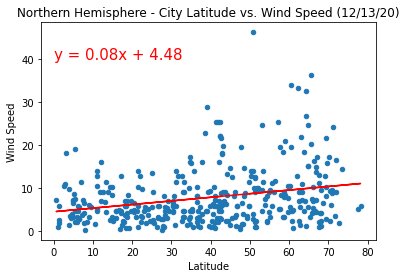

In [41]:
north_lat_temp_plot = north_temps_df.plot(kind="scatter", x="Lat", y="Wind Speed")
north_lat_temp_plot.set_xlabel("Latitude")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (12/13/20)")

x_values = north_temps_df['Lat']
y_values = north_temps_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/NorthernLatitudeWindSpeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08897246327817802


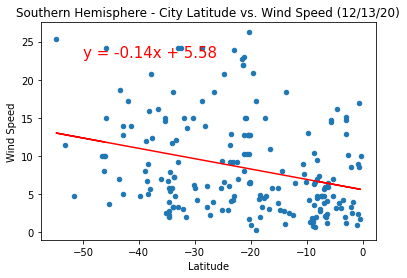

In [42]:
south_lat_temp_plot = south_temps_df.plot(kind="scatter", x="Lat", y="Wind Speed")
south_lat_temp_plot.set_xlabel("Latitude")
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (12/13/20)")

x_values = south_temps_df['Lat']
y_values = south_temps_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,23),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/SouthernLatitudeWindSpeed.png")